# **Jacob Shearer - Exercise Set 7**

In [1]:
import numpy as np
import scipy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.cm import ScalarMappable

**Question 1**

Part (a):

In [2]:
def laplace_line(dimension, n_iter, h):
    n_points = int(dimension/h)
    V = np.zeros((n_points+1, n_points+1))

    for k in range(0, n_points+1): 
        V[k,0] = 100.0  # fixed potential line at 100V

    for iter in range(n_iter):  # iterations over algorithm
        for i in range(1, n_points):                                                
            for j in range(1, n_points): 
                V[i, j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
                
    x = np.arange(0, dimension+h, h)
    x_indices = np.array([s for s in range(len(x))])
    y = np.arange(0, dimension+h, h)
    y_indices = np.array([s for s in range(len(y))])
    X, Y = np.meshgrid(x, y)
    X_indices, Y_indices = np.meshgrid(x_indices, y_indices)
    Z = V[X_indices,Y_indices]                           
    return X, Y, Z

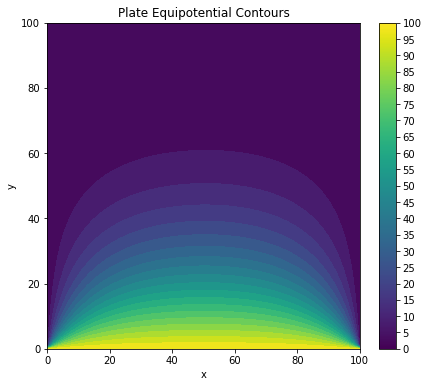

In [3]:
dimension = 100
iterations = 1000
h = 1
X, Y, Z = laplace_line(dimension, iterations, h)
fig, ax = plt.subplots(figsize=(7,6))
qcs = ax.contourf(X, Y, Z, levels=np.arange(0, 105, 5))  # 5 volt contours
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Plate Equipotential Contours')
fig.colorbar(ScalarMappable(norm=qcs.norm, cmap=qcs.cmap), ticks=range(0, 105, 5))
plt.show()  

Part (b):

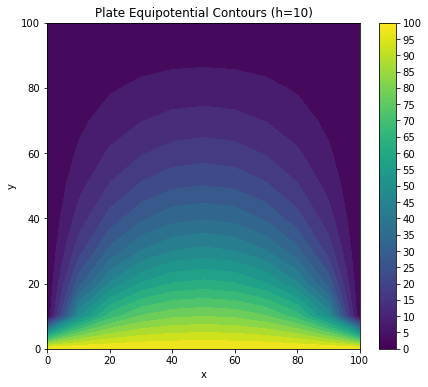

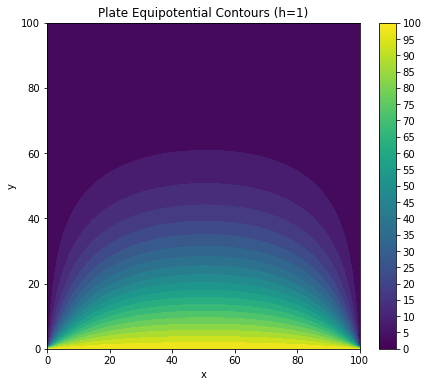

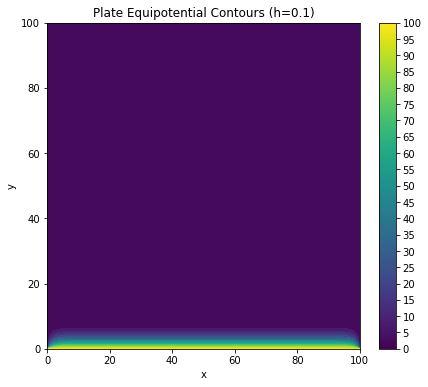

In [4]:
h_list = [10, 1, 0.1]
for h in h_list:
    dimension = 100
    iterations = 1000
    X, Y, Z = laplace_line(dimension, iterations, h)
    fig, ax = plt.subplots(figsize=(7,6))
    qcs = ax.contourf(X, Y, Z, levels=np.arange(0, 105, 5))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Plate Equipotential Contours (h={h})')
    fig.colorbar(ScalarMappable(norm=qcs.norm, cmap=qcs.cmap), ticks=range(0, 105, 5))
    plt.show()  

The solution actually gets *worse* for smaller values of h. It becomes partitularly bad when h = 0.1, which indicates that, for a 101x101 grid, there's probably a threshold h somewhere between 0.1 and 1 for which the solution becomes unstable (and thus inaccurate). 

Part (c):

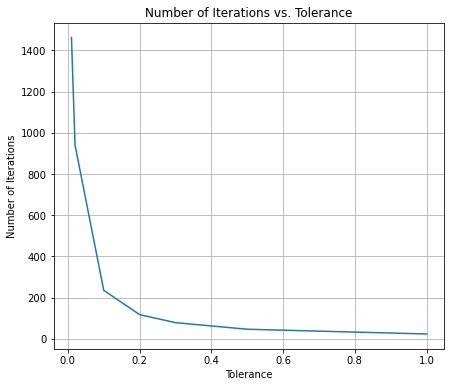

In [7]:
def laplace_line_converge(dimension, h, tolerance):
    n_points = int(dimension/h)
    V = np.zeros((n_points+1, n_points+1))

    for k in range(0, n_points+1): 
        V[k,0] = 100.0

    V_old = np.copy(V)
    n_iter = 1
    while True:
        point_sum = 0
        for i in range(1, n_points):                                                
            for j in range(1, n_points): 
                V[i, j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
        
        for i in range(0, n_points+1):
            for j in range(0, n_points+1):
                if np.abs(V[i, j] - V_old[i, j]) < tolerance:
                    point_sum += 1
        
        if point_sum == len(V)**2:
            break
        
        n_iter += 1
        V_old = np.copy(V)
                
    x = np.arange(0, dimension+h, h)
    x_indices = np.array([s for s in range(len(x))])
    y = np.arange(0, dimension+h, h)
    y_indices = np.array([s for s in range(len(y))])
    X, Y = np.meshgrid(x, y)
    X_indices, Y_indices = np.meshgrid(x_indices, y_indices)
    Z = V[X_indices,Y_indices]                           
    return X, Y, Z, n_iter


dimension = 100
h = 1
tolerance_list = [1, 5e-1, 3e-1, 2e-1, 1e-1, 2e-2, 1e-2]
iteration_list = []
for tolerance in tolerance_list:
    X, Y, Z, n_iter = laplace_line_converge(dimension, h, tolerance)
    iteration_list.append(n_iter)
    
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(tolerance_list, iteration_list)
ax.set_xlabel('Tolerance')
ax.set_ylabel('Number of Iterations')
ax.set_title('Number of Iterations vs. Tolerance')
ax.grid()
plt.show()

The number of iterations required to reach convergence appears to increase exponentially as the tolerance gets smaller.

Part (d):

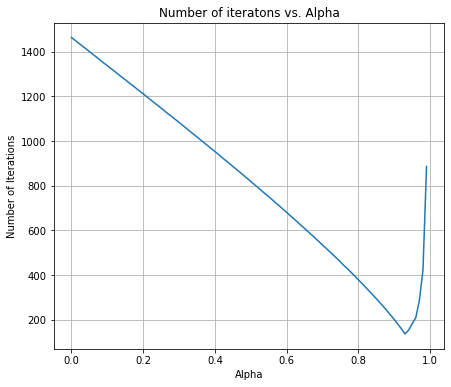

The best value for alpha is somewhere near 0.93.


In [10]:
def laplace_line_relax(dimension, h, tolerance, alpha):
    n_points = int(dimension/h)
    V = np.zeros((n_points+1, n_points+1))

    for k in range(0, n_points+1): 
        V[k,0] = 100.0

    V_old = np.copy(V)
    n_iter = 1
    while True:
        point_sum = 0
        for i in range(1, n_points):                                                
            for j in range(1, n_points): 
                V[i, j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
                V[i, j] = V[i, j] + alpha*(V[i, j] - V_old[i, j])  # Relaxation
        
        for i in range(0, n_points+1):
            for j in range(0, n_points+1):
                if np.abs(V[i, j] - V_old[i, j]) < tolerance:
                    point_sum += 1
        
        if point_sum == len(V)**2:
            break
        
        n_iter += 1
        V_old = np.copy(V)
                
    x = np.arange(0, dimension+h, h)
    x_indices = np.array([s for s in range(len(x))])
    y = np.arange(0, dimension+h, h)
    y_indices = np.array([s for s in range(len(y))])
    X, Y = np.meshgrid(x, y)
    X_indices, Y_indices = np.meshgrid(x_indices, y_indices)
    Z = V[X_indices,Y_indices]                          
    return X, Y, Z, n_iter


dimension = 100
h = 1
tolerance = 1e-2
alpha_list = np.arange(0, 1, 0.01)
iteration_list = []
for alpha in alpha_list:
    X, Y, Z, n_iter = laplace_line_relax(dimension, h, tolerance, alpha)
    iteration_list.append(n_iter)

fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(alpha_list, iteration_list)
ax.set_xlabel('Alpha')
ax.set_ylabel('Number of Iterations')
ax.set_title('Number of iteratons vs. Alpha')
ax.grid()
plt.show()

best_alpha = alpha_list[np.argmin(iteration_list)]
print(f'The best value for alpha is somewhere near {best_alpha}.')

Part (e):

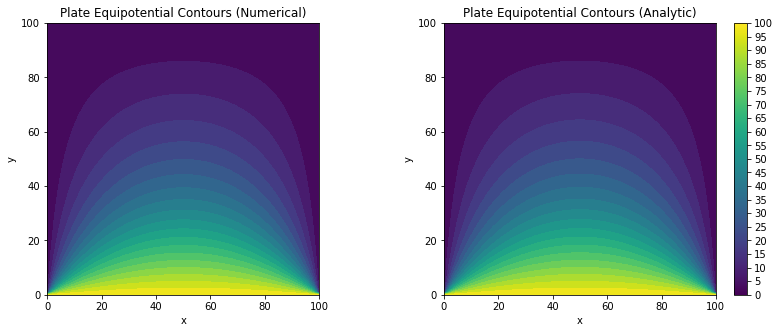

In [11]:
def laplace_line_analytic(dimension, h, tolerance):
    n_points = int(dimension/h)
    V = np.zeros((n_points+1, n_points+1))
    
    x_arr = np.arange(0, dimension+h, h)
    x_indices = np.array([s for s in range(len(x_arr))])
    y_arr = np.arange(0, dimension+h, h)
    y_indices = np.array([s for s in range(len(y_arr))])
    X, Y = np.meshgrid(x_arr, y_arr)
    X_indices, Y_indices = np.meshgrid(x_indices, y_indices)

    V_old = np.copy(V)
    n_iter = 1
    while True:
        if n_iter % 2 == 0:
            n_iter += 1
            continue
        
        point_sum = 0
        for i in range(1, n_points):
            x = x_arr[i]
            for j in range(1, n_points):
                y = y_arr[j]
                term1 = (400/(n_iter*np.pi))
                term2 = np.sin((n_iter*np.pi*x)/dimension)
                term3 = (np.sinh((n_iter*np.pi*y)/dimension)/np.sinh(n_iter*np.pi))
                V[i, j] = V[i, j] + term1*term2*term3
        
        for i in range(0, n_points+1):
            for j in range(0, n_points+1):
                if np.abs(V[i, j] - V_old[i, j]) < tolerance:
                    point_sum += 1
        
        if point_sum == len(V)**2:
            break
        
        n_iter += 1
        V_old = np.copy(V)
        
    for i in range(len(V)):  # I defined my coordinates differently so I'm flipping the result
        V[i] = V[i, ::-1]
    
    for k in range(0, n_points+1): 
        V[k,0] = 100.0
                
    Z = V[X_indices,Y_indices]                          
    return X, Y, Z, n_iter


dimension = 100
h = 1
tolerance = 1e-2
alpha = 0.93
num_X, num_Y, num_Z, num_iter = laplace_line_relax(dimension, h, tolerance, alpha)
ana_X, ana_Y, ana_Z, ana_iter = laplace_line_analytic(dimension, h, tolerance)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 5))
num = ax1.contourf(num_X, num_Y, num_Z, levels=np.arange(0, 105, 5))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Plate Equipotential Contours (Numerical)')
ax1.set_aspect('equal', adjustable='box')
fig.colorbar(ScalarMappable(norm=num.norm, cmap=num.cmap), ticks=range(0, 105, 5))
ana = ax2.contourf(ana_X, ana_Y, ana_Z, levels=np.arange(0, 105, 5))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Plate Equipotential Contours (Analytic)')
ax2.set_aspect('equal', adjustable='box')
plt.show()

These two plots look pretty much identical, so it's probably safe to assume that the numerical solution is accurate. 